Please submit an electronic version of your Python Jupyter notebook on NYU Brightspace. Remember that this assignment is to be done individually. Solutions will be posted a few days after the due date (on Feb 20th), so assignments submitted until that day will receive a late penalty, but no late assignments will be accepted after the solutions are posted.

Total points for this HW: 10

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10%)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3%)

Your answer here.

A decision tree can use the city business survival rate. By collecting the data of start-up businesses' intended location, employee count, start-up rate, etc., as the leaf, using the actual profit of existing businesses as the classification, we can build the tree. 

This problem requires clear interpretability, where decisions must be explained to a diverse set of stakeholders, including business owners, policymakers, and investors. Stakeholders can readily see which factors contribute most significantly to a business's likelihood of survival and understand the model's decision-making process. 

In contrast, even though the random forest has more capability in prediction, multiple tree aggregation may cause conditions that are too complicated for start-up businesses, which is hard to achieve in real life.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3%)

Your answer here.

Prediction of locations with high crime rates can be used by random forests instead of decision trees. 

The reasons causing crime are complicated and challenging to conclude. It is hard to interpret the leaf of the decision tree. Also, random forests can restrict overfitting situations in which decision trees might happen. 

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4%)

Your answer here.
To harness the strengths of a Random Forest model for prediction while ensuring a logical analysis of feature contributions, one should start with employing the model for initial predictions due to its robust handling of complex feature interactions. Following this, the focus shifts to analyzing feature importance within the Random Forest, utilizing the model's intrinsic metrics that reflect each feature's impact on reducing node impurity across all trees. This analysis culminates in the ranking of features based on their importance, guiding the sequential consideration of features in order of their predictive power. Such a strategy not only leverages the predictive accuracy of Random Forests but also provides a systematic and theoretically grounded approach to identifying and prioritizing the most influential features, thereby offering a practical framework for targeted interventions and deeper insights into the predictive model.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been modified, so you may get a different tree than the one shown in the lecture notes.  (30%)

In [24]:
import pandas as pd
import numpy as np

In [25]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\ngood,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2%)

In [26]:
# your code here
df['MPG'].value_counts()

bad     14
good     6
Name: MPG, dtype: int64

# 'BAD' is the most common value

In [27]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5%)

In [28]:
# your code here
info_gains = {} #ChatGPT provide idea of create a empty serise to store result

for column in ['cylinders', 'weight']:
    unique_values = df[column].unique() #ChatGPT provide the idea for unique the data frame
    for i in unique_values:
        yes_group = df[df[column] == i]  
        no_group = df[df[column] != i]  
        
        
        goodY = (yes_group['MPG'] == 'good').sum()
        badY = (yes_group['MPG'] == 'bad').sum()
        goodN = (no_group['MPG'] == 'good').sum()
        badN = (no_group['MPG'] == 'bad').sum()

        
        ig = InformationGain(goodY, badY, goodN, badN)
        info_gains[f"{column} == {i}"] = ig #ChatGPT filled the 


for split, ig in info_gains.items(): #ChatGPT 
    print(f"{split}: {ig:.3f}")


cylinders == 4: 0.468
cylinders == 6: 0.192
cylinders == 8: 0.153
weight == light: 0.192
weight == medium: 0.006
weight == weighty: 0.192


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5%) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [29]:
df = df.sort_values(by='HP', ascending=True)

In [30]:
shifted_column = df['HP'].shift(-1)

# Calculate the midpoint between each element and its next one
df['HPmidpoints'] = (df['HP'] + shifted_column) / 2


In [31]:
# your code here
info_gains = {}
for i in df['HPmidpoints']:
    unique_values = df['HPmidpoints'].unique()
    for i in unique_values:
        yes_group = df[df['HPmidpoints'] <= i]  
        no_group = df[df['HPmidpoints'] >i]  

        goodY = (yes_group['MPG'] == 'good').sum()
        badY = (yes_group['MPG'] == 'bad').sum()
        goodN = (no_group['MPG'] == 'good').sum()
        badN = (no_group['MPG'] == 'bad').sum()

        ig = InformationGain(goodY, badY, goodN, badN)
        info_gains[f"HP = {i}"] = ig

for split, ig in info_gains.items():
    print(f"{split}: {ig:.3f}")

HP = 70.0: 0.092
HP = 78.0: 0.195
HP = 83.0: 0.313
HP = 87.0: 0.159
HP = 89.5: 0.274
HP = 91.0: 0.186
HP = 92.5: 0.320
HP = 93.5: 0.558
HP = 94.5: 0.465
HP = 95.0: 0.324
HP = 97.5: 0.268
HP = 100.0: 0.218
HP = 105.0: 0.174
HP = 124.5: 0.133
HP = 142.0: 0.096
HP = 157.5: 0.062
HP = 172.5: 0.030
HP = 182.5: 0.000
HP = nan: nan


/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_65022/3631731999.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4%)

Your answer here.

# If HP<=93.5 is the optimal binary split of the data, becasue it has the highest information gain. 

In [32]:
HP_data = df[df['HP']<=93.5]

In [33]:
HP_data['MPG'].value_counts()

good    6
bad     2
Name: MPG, dtype: int64

In [34]:
bad_data = df[df['HP']>93.5]
bad_data['MPG'].value_counts()

bad    12
Name: MPG, dtype: int64

according to the HP_data which picked out the rows' HP<=93.5, we still can see 2 bads in the dataframe, and all bad if HP>93.5. So choosing the yes node of HP<=93.5 should be contiune partition. 

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6%)

In [35]:
# your code here
info_gains_HP = {} #ChatGPT provide idea of create a empty serise to store result

for column in ['cylinders', 'weight']:
    unique_values = HP_data[column].unique() #ChatGPT provide the idea for unique the data frame
    for i in unique_values:
        yes_group = HP_data[HP_data[column] == i]  
        no_group = HP_data[HP_data[column] != i]  
        
        
        goodY = (yes_group['MPG'] == 'good').sum()
        badY = (yes_group['MPG'] == 'bad').sum()
        goodN = (no_group['MPG'] == 'good').sum()
        badN = (no_group['MPG'] == 'bad').sum()

        
        ig = InformationGain(goodY, badY, goodN, badN)
        info_gains_HP[f"{column} == {i}"] = ig #ChatGPT filled the 


for split, ig in info_gains_HP.items(): #ChatGPT 
    print(f"{split}: {ig:.3f}")


cylinders == 4: 0.811
cylinders == 6: 0.811
weight == light: 0.311
weight == medium: 0.311


In [36]:
cy_data = HP_data[HP_data['cylinders']==6]
cy_data['MPG'].value_counts()

bad    2
Name: MPG, dtype: int64

# Since in the computing the informationgain from df, the good MPG gained when cylinders=4, we pick if cylinders=4 MPG is good

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4%)

Your answer here
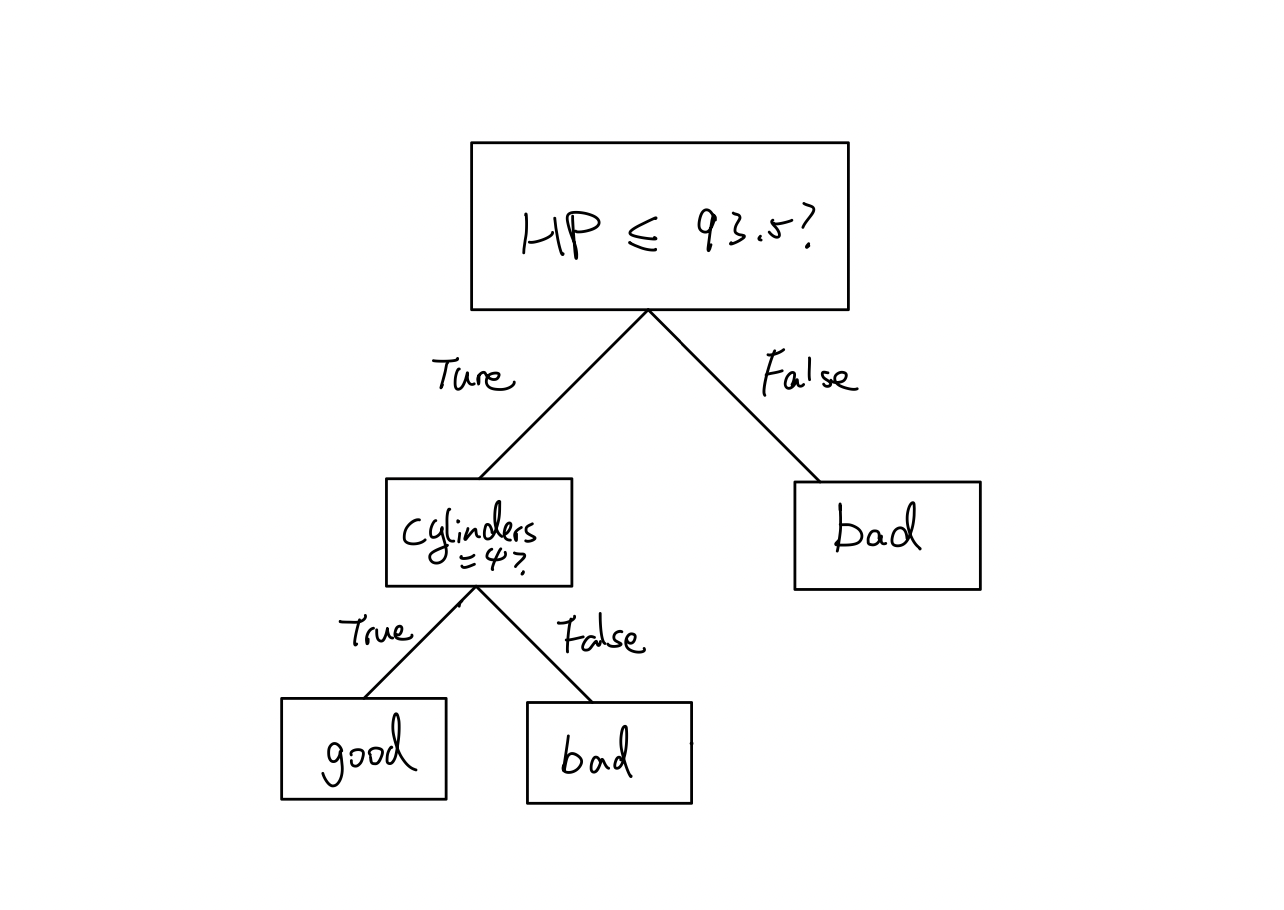

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4%)

MPG,cylinders,HP,weight

good,4,93,light

bad,6,113,medium

good,4,83,weighty

bad,6,70,weighty


### Question 3, Predicting burden of disease （40%)

In [37]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10%)

In [38]:
data

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high
3,Angola,0.2,0.63,14009,0.39604,0.69307,0.158420,0.55446,0.028,0.842,0.0670,22,1942,0.66139,0.53267,awful
4,Armenia,1.0,2.51,2780,0.79208,0.98020,0.603960,0.95050,0.060,0.202,0.1720,11,5697,0.97624,0.97030,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Venezuela Bolivarian Republic of,1.0,0.18,51021,0.69307,0.84158,0.475250,0.70297,0.045,0.443,0.0010,65,6104,0.92475,0.92178,medium
126,Viet Nam,1.0,1.85,11406,0.66337,0.92079,0.257430,0.83168,0.054,0.278,0.0260,7,3298,0.89406,0.86040,medium
127,Yemen,1.0,2.18,223,0.67327,0.73267,0.138610,0.75248,0.055,0.409,0.0880,13,1653,0.49703,0.29703,awful
128,Zambia,1.0,2.94,10095,0.35644,0.89109,0.316830,0.67327,0.054,0.514,0.4470,11,1013,0.79802,0.74059,awful


In [39]:
# your code here
from sklearn.model_selection import train_test_split
# remove records with any missing values
data=data.dropna()

# Let's take "found.weapon" as the target variable. 
y=data.BurdenOfDisease

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X = data.iloc[:,1:-1]
X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print(X_train.head())

    FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
7             1.0             0.00                 66            0.85149   
53            1.0             8.04             317000            0.82178   
15            1.0             4.19               9345            0.89109   
36            0.4             0.12              25183            0.28713   
12            1.0             2.87              45564            0.59406   

    SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
7             0.97030            0.99010            0.99010   
53            0.82178            0.59406            0.85149   
15            0.99010            0.24752            0.56436   
36            0.82178            0.22772            0.42574   
12            0.85149            0.69307            0.64356   

    TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
7                0.064                   0.475                    0.002   
53            

In [40]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
OS=[]
for i in range(1,20): 
    dt = DecisionTreeClassifier(max_depth=i)#not working for max_leaf_nodes, so I asked ChatGPT and it suggest me try max_depth
    dt.fit(X_train,y_train)
    OS.append((i, dt.score(X_test, y_test)))

Score = pd.DataFrame(OS, columns=['Nodes', 'Accuracy'])
Score

,Nodes,Accuracy
0,1,0.333333
1,2,0.615385
2,3,0.641026
3,4,0.666667
4,5,0.666667
5,6,0.615385
6,7,0.615385
7,8,0.641026
8,9,0.666667
9,10,0.641026


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10%)

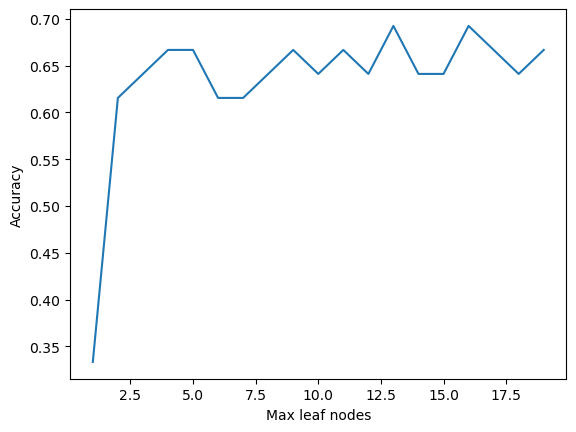

In [41]:
# your code here
import matplotlib.pylab as plt
plt.plot(Score.Nodes,Score.Accuracy)
plt.xlabel("Max leaf nodes")
plt.ylabel("Accuracy")
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10%)

In [42]:
# your code here
from sklearn.model_selection import GridSearchCV
# This time we'll use max_depth to control the complexity of the tree, still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_train,y_train)
print(rs.best_estimator_)
print(rs.score(X_test, y_test))

DecisionTreeClassifier(max_depth=6)
0.6666666666666666


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (10%)

In [43]:
data['BurdenOfDisease'].value_counts()

low       33
high      33
awful     32
medium    32
Name: BurdenOfDisease, dtype: int64

In [44]:
# your code here
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2) # just to keep it simple for visualization
dt.fit(X_train,y_train)

# display the output using www.webgraphviz.com, or if you have GraphViz installed on
# your computer, you can use that
print(tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=['low','high','awful','medium'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="AdultLtrcyRate <= 0.856, samples = 91, value = [17, 25, 26, 23], class = awful", fillcolor="#fcfeff"] ;
1 [label="GDPPCptaIntDol <= 1094.0, samples = 48, value = [17, 22, 1, 8], class = high", fillcolor="#e1fbdf"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 9, value = [9, 0, 0, 0], class = low", fillcolor="#e58139"] ;
1 -> 2 ;
3 [label="samples = 39, value = [8, 22, 1, 8], class = high", fillcolor="#acf3a6"] ;
1 -> 3 ;
4 [label="SustAccImprSanUrb <= 0.842, samples = 43, value = [0, 3, 25, 15], class = awful", fillcolor="#b8dcf6"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 12, value = [0, 2, 1, 9], class = medium", fillcolor="#e374ed"] ;
4 -> 5 ;
6 [label="samples = 31, value = [0, 1, 24, 6], class = awful", fillcolor="#70b8ec"] ;
4 -> 6 ;
}


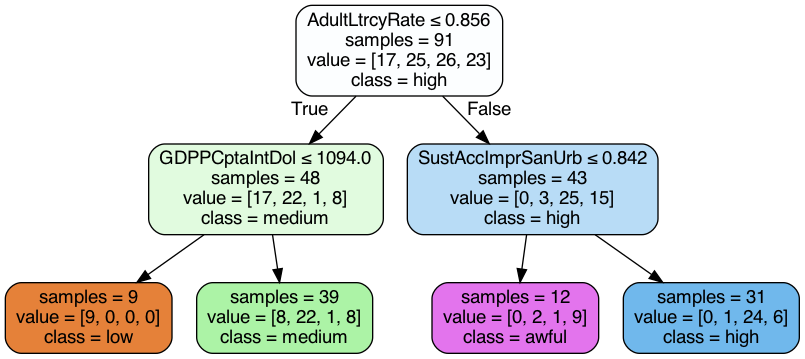

In [45]:
# This will only work if GraphViz is installed on your machine
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['low','medium','high','awful'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Question 4, Fit a random forest to the data from question 3 (20%)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10%)

In [46]:
# your code here
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
print(rf.score(X_test,y_test))

0.6666666666666666


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10%)

Your answer here. 

Decision trees offer a high level of interpretability, allowing users to clearly see and understand the criteria behind each split, including the selection of nodes and leaves at every stage. This transparency facilitates a straightforward explanation of how and why the model arrives at its decisions, such as halting splits when a target category, like "good" MPG, is fully segregated, despite the fact that their simplicity and limited depth might constrain the model's accuracy on larger or more complex datasets. On the other hand, Random Forests, while generally achieving higher accuracy rates between 60-70% due to their ensemble approach of combining multiple decision trees and thereby capturing more complex patterns in the data, suffer from reduced interpretability. The complexity of multiple intertwined trees makes it challenging to trace back and elucidate the specific reasoning for each decision, hindering the ability to modify or interpret individual tree decisions within the forest. This trade-off between accuracy and interpretability underscores the choice between using a single decision tree for clearer insights and a Random Forest for better predictive performance on test data.